In [10]:
# try to run the code on google colab...
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  subject_figures_path = root + "4. Results/2. Group level/"
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
#   root = "C:/Users/DiogoMelo/nutreconDrive/"
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  # define a path to save the the figures from the analysis
#   subject_figures_path = "C:/Users/DiogoMelo/NUTRECON/Results/Group Level/"
  subject_figures_path = "D:/FV/Projects/NUTRECON/Results/Group Level/"
  print('Running Code locally')

from scipy.optimize import minimize
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append(root + 'python')
from variableCoding import Vars
import importData as load_data
import plots as myPlots
import plotly.express as px

_v_ = Vars()
experiment_code = _v_.experiment_code
responses_dataPath = _v_.responses_dataPath
ratings_id = _v_.ratings_fileID

# subject_code_list = list(set([s.split('\\')[-1].split('_')[0] for s in glob('{}{}*{}*'.format(responses_dataPath, experiment_code, ratings_id))]))

data_folder = responses_dataPath.split('Data')[0] + 'Data/'


Running Code locally


Load data path

In [11]:
nutrecon_path = "{}nutrecon_task.xlsx".format(data_folder)
flavor_path = "{}FlavourRatings.xlsx".format(data_folder)
calorieCodes_path = "{}calorie_codes.xlsx".format(data_folder)
psychometrics_path = "{}NUTRECON_psychometrics.xlsx".format(data_folder)

figure_path = 'C:/Users/Admin/Desktop/REPORT NUTRECON/'

# Load sociodemographic, feeding behaviour and psychometrics into DataFrames
# Data is stored in a Google sheets and each sheet corresponds to a scale or sociodemographic data

psychometrics_dict = pd.read_excel(psychometrics_path, sheet_name=None, index_col=0)

sociodemoWithExcluded_df = load_data.sociodemographic(psychometrics_dict)

sociodemoWithExcluded_df.tail()

,sub_id,age,sex (0/1),education (years),education,height,weight,bmi,cohort_id,excluded
24,nutre025,42.0,1,18,Mestrado,1.660,61.6,22.400,cohort 3,0
25,nutre026,29.0,1,18,Mestrado*,1.745,79.6,26.141,cohort 3,0
26,nutre027,21.0,1,12,Secundário,1.540,56.9,24.000,cohort 3,3
27,nutre028,19.0,1,12,Secundário,1.700,57.9,NaN,cohort 3,0
28,nutre029,20.0,1,12,Secundário,1.650,69.2,25.420,cohort 3,0


In [12]:
flavorRatings_df = pd.read_excel(flavor_path)
flavorRatings_df.tail()

,Day,Trial,User,intensity,intensity_timestamp,novelty,novelty_timestamp,pleasantness,pleasantness_timestamp,Flavor,flavor_id,cohort_id,excluded
417,1.5,4,nutre032,3,1686827510,72,1686827502,2,1686827515,licorice,k,cohort 3,0
418,2.0,1,nutre032,3,1686907180,0,1686907174,5,1686907187,licorice,k,cohort 3,0
419,2.0,2,nutre032,6,1686907206,0,1686907201,18,1686907212,blueberry,g,cohort 3,0
420,3.0,1,nutre032,8,1687340225,0,1687340220,9,1687340230,blueberry,g,cohort 3,0
421,3.0,2,nutre032,19,1687340272,2,1687340268,-2,1687340276,licorice,k,cohort 3,0


In [13]:
nutrecon_df = pd.read_excel(nutrecon_path)
nutrecon_df.head()



,Day,Trial,Trial ID,Trial Type,User,block,choice,choiceStart_ms,choiceTime,choiceTime_ms,...,reference p,reference qt,reference shape,reference type,trialStartTimestamp,trialStart_ms,cohort_id,excluded,chosen reward,chosen option
0,2,1,21,same,nutre001,0,2,49313,2250,50147,...,1.0,1.0,NaN,money,1669375559,47371,cohort 1,0,money,lottery
1,2,2,50,same,nutre001,0,2,52917,2250,54018,...,1.0,20.0,hexagon,CS-,1669375563,51034,cohort 1,0,CS-,lottery
2,2,3,18,same,nutre001,0,2,56771,2250,57055,...,1.0,1.0,NaN,money,1669375567,54891,cohort 1,0,money,lottery
3,2,4,71,same,nutre001,0,1,59808,2250,60876,...,1.0,20.0,hexagon,CS-,1669375570,57937,cohort 1,0,CS-,reference
4,2,5,36,same,nutre001,0,1,63662,2250,64280,...,1.0,20.0,square,CS+,1669375574,61796,cohort 1,0,CS+,reference


In [14]:
calorieCodes_df = load_data.get_conditionedFlavor(nutrecon_df)
calorieCodes_df.tail()

,sub_id,Flavor,shape,calorie
55,nutre030,pomegranate,cross,CS+
56,nutre031,pomegranate,square,CS-
57,nutre031,ginseng,cross,CS+
58,nutre032,licorice,square,CS-
59,nutre032,blueberry,circle,CS+


In [15]:
ratings_and_calorie_df = load_data.get_ratings_and_calories(flavorRatings_df, calorieCodes_df)
ratings_and_calorie_df

,User,cohort_id,Day,novelty,intensity,pleasantness,Flavor,shape,calorie
0,nutre001,cohort 1,1.0,94,22,-19,blueberry,NaN,NaN
1,nutre001,cohort 1,1.0,57,6,18,cashew,hexagon,CS-
2,nutre001,cohort 1,1.0,3,9,17,dragon fruit,NaN,NaN
3,nutre001,cohort 1,1.0,0,6,35,ginseng,NaN,NaN
4,nutre001,cohort 1,1.0,27,26,-12,grapefruit,NaN,NaN
...,...,...,...,...,...,...,...,...,...
417,nutre032,cohort 3,1.5,72,3,2,licorice,square,CS-
418,nutre032,cohort 3,2.0,0,6,18,blueberry,circle,CS+
419,nutre032,cohort 3,2.0,0,3,5,licorice,square,CS-
420,nutre032,cohort 3,3.0,0,8,9,blueberry,circle,CS+


## Overview of all cohorts

### Sociodemographic data

#### Excluded participants

In [16]:
excluded = pd.DataFrame(sociodemoWithExcluded_df.groupby('cohort_id')['excluded'].value_counts())
excluded.index.names = ['cohort_id', 'exclusion'] 
excluded.columns = ['count']
excluded



count
cohort_id exclusion       
cohort 1  0              7
          2              1
          3              0
cohort 2  0              9
          2              3
          3              0
cohort 3  0              7
          3              2
          2              0

In [17]:
sociodemo_df = sociodemoWithExcluded_df[sociodemoWithExcluded_df.excluded == 0]
sex_df = pd.DataFrame(sociodemo_df.groupby('cohort_id')['sex (0/1)'].value_counts()).reset_index()
sex_df.columns = ['cohort_id', 'exclusion', 'count'] 

n_per_cohort = pd.DataFrame(sex_df.groupby('cohort_id')['count'].sum())
n_per_cohort


,count
cohort_id,
cohort 1,7
cohort 2,9
cohort 3,7


In [18]:

sociodemo_df.groupby('cohort_id')['education'].value_counts()

sociodemo_df.groupby('cohort_id')[['age', 'bmi']].describe()

age                                                      bmi  \
          count       mean       std   min   25%   50%   75%   max count   
cohort_id                                                                  
cohort 1    7.0  21.285714  2.360387  18.0  20.0  22.0  22.5  24.0   7.0   
cohort 2    9.0  22.777778  1.787301  21.0  22.0  23.0  23.0  27.0   9.0   
cohort 3    7.0  26.428571  8.423324  19.0  20.5  22.0  30.5  42.0   5.0   

                                                                            \
                mean       std        min        25%        50%        75%   
cohort_id                                                                    
cohort 1   21.611907  2.208090  18.688000  19.778224  22.018141  23.457912   
cohort 2   22.041061  2.377281  19.579922  20.549887  21.619745  22.665243   
cohort 3   25.172200  2.187465  22.400000  23.800000  25.420000  26.141000   

                      
                 max  
cohort_id             
cohort 1   24.104938  
cohort 2   26.928418  
cohort 3   28.100000

## Cohort 2

### Neuoeconomics

#### Group plots

In [19]:
problem_participants = ['nutre001', 'nutre002', 'nutre004', 'nutre005',
                'nutre012','nutre014', 'nutre015', 'nutre017']
noProb_mask = ~(nutrecon_df['User'].isin(problem_participants))
notExluded_mask = nutrecon_df.excluded == 0

nutrecon_clean_df = nutrecon_df[noProb_mask & notExluded_mask]

print(nutrecon_clean_df['lottery type'].unique())
nutrecon_clean_df


['CS+' 'CS-' 'money']


,Day,Trial,Trial ID,Trial Type,User,block,choice,choiceStart_ms,choiceTime,choiceTime_ms,...,reference p,reference qt,reference shape,reference type,trialStartTimestamp,trialStart_ms,cohort_id,excluded,chosen reward,chosen option
3116,2,1,99,mixed,nutre003,0,0,58660,2250,60910,...,1.0,0.2,NaN,money,1670580853,56710,cohort 1,0,NaN,NaN
3117,2,2,96,mixed,nutre003,0,0,63682,2250,65932,...,1.0,0.2,NaN,money,1670580858,61768,cohort 1,0,NaN,NaN
3118,2,3,119,mixed,nutre003,0,0,68721,2250,70971,...,1.0,0.2,NaN,money,1670580863,66801,cohort 1,0,NaN,NaN
3119,2,4,107,mixed,nutre003,0,0,73760,2250,76010,...,1.0,0.2,NaN,money,1670580868,71815,cohort 1,0,NaN,NaN
3120,2,5,101,mixed,nutre003,0,1,78782,2250,78849,...,1.0,0.2,NaN,money,1670580873,76853,cohort 1,0,money,reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63876,4,235,5,same,nutreMoneyTest003,5,1,1194783,2250,1195087,...,1.0,2.0,NaN,money,0,0,Money Test,0,money,reference
63877,4,236,10,same,nutreMoneyTest003,5,1,1198138,2250,1198441,...,1.0,2.0,NaN,money,0,0,Money Test,0,money,reference
63878,4,237,16,same,nutreMoneyTest003,5,2,1201502,2250,1202144,...,1.0,2.0,NaN,money,0,0,Money Test,0,money,lottery
63879,4,238,9,same,nutreMoneyTest003,5,1,1205211,2250,1205565,...,1.0,2.0,NaN,money,0,0,Money Test,0,money,reference


In [20]:
def get_probLottery(group):
  prob_lotteryChoice = len(group[group['choice'] == 2]) / len(group[group['choice'] != 0])
  return prob_lotteryChoice

choiceCount_df = nutrecon_clean_df.groupby(
            [_v_.group_colName, 'User','Day', 'Trial Type', 
             'reference type', 'reference qt', 'reference p', 
             'lottery type', 'lottery p', 'lottery qt']).apply(
        lambda df: get_probLottery(df)).reset_index().rename(columns = {0 : _v_.probLotteryChoice_colName})

choiceCount_df

,cohort_id,User,Day,Trial Type,reference type,reference qt,reference p,lottery type,lottery p,lottery qt,Prob. of choosing lottery
0,Money Test,nutreMoneyTest001,4,same,money,2.0,1.0,money,0.13,2.0,0.000000
1,Money Test,nutreMoneyTest001,4,same,money,2.0,1.0,money,0.13,5.0,0.000000
2,Money Test,nutreMoneyTest001,4,same,money,2.0,1.0,money,0.13,12.0,0.166667
3,Money Test,nutreMoneyTest001,4,same,money,2.0,1.0,money,0.13,20.0,0.166667
4,Money Test,nutreMoneyTest001,4,same,money,2.0,1.0,money,0.22,2.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
18810,cohort 3,nutre032,3,same,money,2.0,1.0,money,0.75,18.2,1.000000
18811,cohort 3,nutre032,3,same,money,2.0,1.0,money,0.75,18.8,1.000000
18812,cohort 3,nutre032,3,same,money,2.0,1.0,money,0.75,19.2,1.000000
18813,cohort 3,nutre032,3,same,money,2.0,1.0,money,0.75,19.6,1.000000


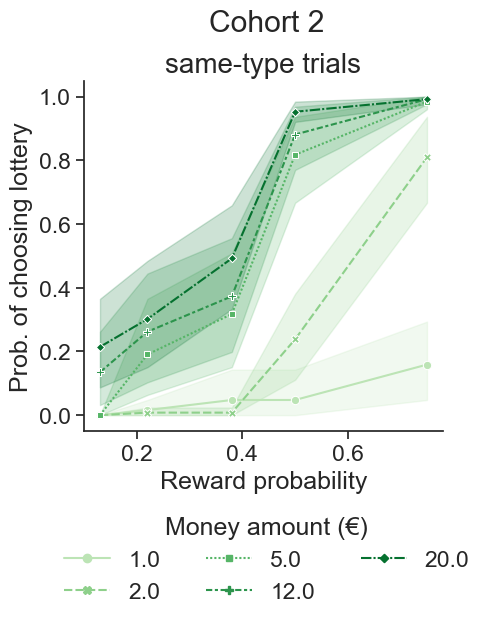

In [69]:
cohort2_mask = choiceCount_df.cohort_id == 'cohort 2'
sameType_mask = choiceCount_df['Trial Type'] == 'same'
mixedType_mask = choiceCount_df['Trial Type'] == 'mixed'
money_mask = choiceCount_df["lottery type"] == 'money'

df = choiceCount_df[cohort2_mask & sameType_mask & money_mask]

# Greens Palette without first color
palette = [ (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

sns.set(font_scale=1.5)
sns.set_style("ticks")
g = sns.relplot(
    data=df.reset_index(drop=True), x='lottery p', y=_v_.probLotteryChoice_colName, 
    row="lottery type", col = 'Trial Type',markers = True, height = 4.925, aspect = 1, palette=palette,
    hue="lottery qt", style="lottery qt", kind="line",facet_kws={'sharex': False, 'legend_out': True , },
    )

g.set_titles("{col_name}-type trials", size = 20)
g.set(ylim=(-.05, 1.05))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
g.fig.suptitle('Cohort 2', va = 'bottom')
g.set_axis_labels("Reward probability", )

# # Simple legend
# g._legend.set_title('Quantity (€)')

# 3 Columned legend underneath
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g._legend.remove()
g.fig.legend(handles, labels, ncol=3, loc='upper center', 
                bbox_to_anchor=(0.5, 0.05), frameon=False, title = 'Money amount (€)')


g.fig.savefig('{}cohort2_moneyST.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')


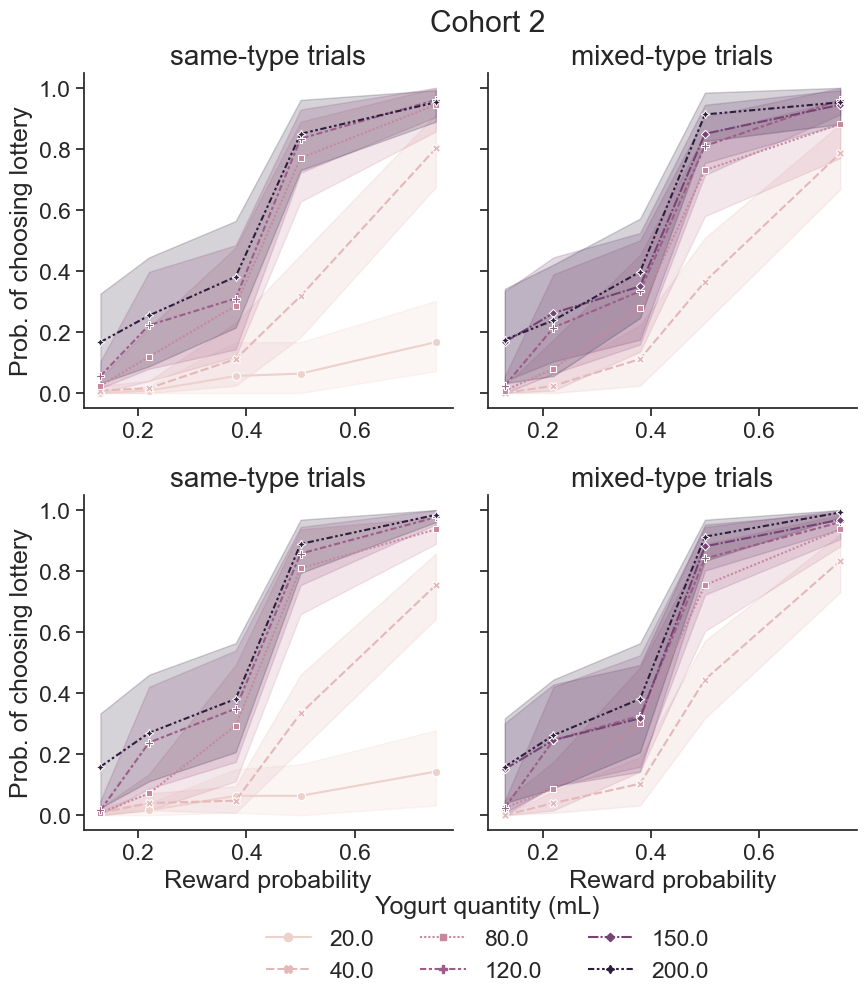

In [70]:
df = choiceCount_df[cohort2_mask & (sameType_mask | mixedType_mask) & ~money_mask]

sns.set(font_scale=1.5)
sns.set_style("ticks")
g = sns.relplot(
    data=df.reset_index(drop=True), x='lottery p', y=_v_.probLotteryChoice_colName, 
    row="lottery type", col = 'Trial Type', col_order= ['same', 'mixed'], row_order = ['CS+', 'CS-'],
    markers = True, height = 4.5, aspect = 1, #palette='rocket_r',
    hue="lottery qt", style="lottery qt", kind="line",facet_kws={'sharex': False, 'legend_out': True },
    )

g.set_titles("{col_name}-type trials", size = 20)
g.set(ylim=(-.05, 1.05))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
g.fig.suptitle('Cohort 2', va = 'bottom')
g.set_axis_labels("Reward probability", )

# # Simple legend
# g._legend.set_title('Quantity (mL)')

# 3 Columned legend underneath
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g._legend.remove()
g.fig.legend(handles, labels, ncol=3, loc='upper center', 
                bbox_to_anchor=(0.5, 0.05), frameon=False, title = 'Yogurt quantity (mL)')

g.fig.savefig('{}cohort2_yogurt_STandMT.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

#### Example subjects

##### "Good" behaviour

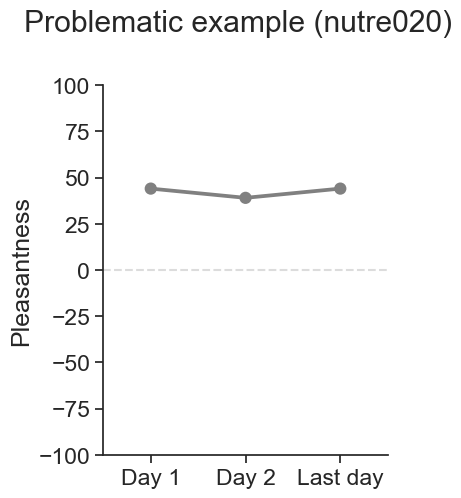

In [77]:
good_subject = 'nutre020'

goodRatesCalorie_df = ratings_and_calorie_df[(ratings_and_calorie_df.User == good_subject) &
                                             (ratings_and_calorie_df.calorie == 'CS-')]

fig, ax = plt.subplots()#figsize=(3.504166666666667,3.597052411167513))

sns.set(font_scale=1.5)
sns.set_style("ticks")
sns.pointplot(data = goodRatesCalorie_df, x = 'Day', y = 'pleasantness', ax = ax, color = 'grey')
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
ax.set_xticklabels(['Day 1', 'Day 2', 'Last day'])
ax.set_xlabel('')
ax.set_ylabel('Pleasantness')
ax.set_ylim([-100, 100])
ax.set_box_aspect(1.3)
ax.axhline(0, ls = '--', color = 'gainsboro')
fig.suptitle('Problematic example ({})'.format(good_subject), va = 'bottom')

fig.savefig('{}goodSubject_pleasRate.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

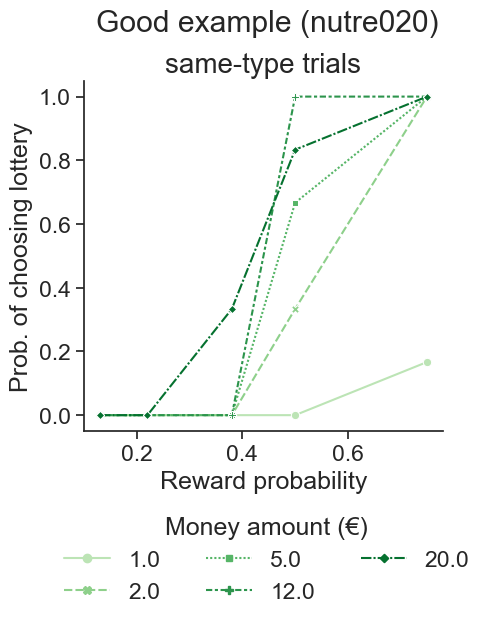

In [78]:
goodSubject_df = nutrecon_df[nutrecon_df.User == good_subject]
goodSubject_df = goodSubject_df[goodSubject_df.Day ==2]
goodSubject_choiceCount_df = goodSubject_df.groupby(
            [_v_.group_colName, 'User','Day', 'Trial Type', 
             'reference type', 'reference qt', 'reference p', 
             'lottery type', 'lottery p', 'lottery qt']).apply(
        lambda df: get_probLottery(df)).reset_index().rename(columns = {0 : _v_.probLotteryChoice_colName})
goodSubject_choiceCount_df

goodSub_sameType_mask = goodSubject_choiceCount_df['Trial Type'] == 'same'
goodSub_mixedType_mask = goodSubject_choiceCount_df['Trial Type'] == 'mixed'
goodSub_money_mask = goodSubject_choiceCount_df["lottery type"] == 'money'

df = goodSubject_choiceCount_df[goodSub_sameType_mask & goodSub_money_mask]

# Greens Palette without first color
palette = [ (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

sns.set(font_scale=1.5)
sns.set_style("ticks")
g = sns.relplot(
    data=df.reset_index(drop=True), x='lottery p', y=_v_.probLotteryChoice_colName, 
    row="lottery type", col = 'Trial Type',markers = True, height = 4.925, aspect = 1, palette=palette,
    hue="lottery qt", style="lottery qt", kind="line",facet_kws={'sharex': False, 'legend_out': True , },
    )

g.set_titles("{col_name}-type trials", size = 20)
g.set(ylim=(-.05, 1.05))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
g.fig.suptitle('Good example (nutre020)', va = 'bottom')
g.set_axis_labels("Reward probability", )

# # Simple legend
# g._legend.set_title('Quantity (€)')

# 3 Columned legend underneath
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g._legend.remove()
g.fig.legend(handles, labels, ncol=3, loc='upper center', 
                bbox_to_anchor=(0.5, 0.05), frameon=False, title = 'Money amount (€)')

g.fig.savefig('{}goodSubject_moneyST.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

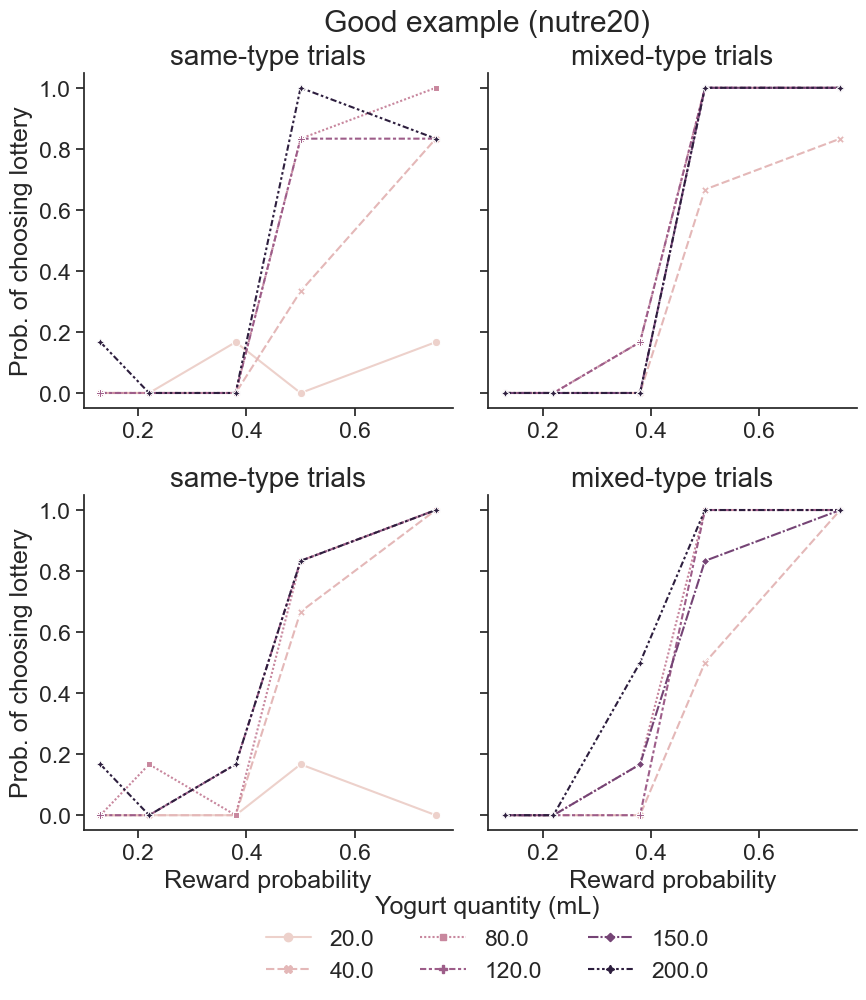

In [79]:
df = goodSubject_choiceCount_df[(goodSub_sameType_mask | goodSub_mixedType_mask) & ~goodSub_money_mask]

sns.set(font_scale=1.5)
sns.set_style("ticks")
g = sns.relplot(
    data=df.reset_index(drop=True), x='lottery p', y=_v_.probLotteryChoice_colName, 
    row="lottery type", col = 'Trial Type', col_order= ['same', 'mixed'], row_order = ['CS-', 'CS+'],
    markers = True, height = 4.5, aspect = 1, #palette='rocket_r',
    hue="lottery qt", style="lottery qt", kind="line",facet_kws={'sharex': False, 'legend_out': True },
    )

g.set_titles("{col_name}-type trials", size = 20)
g.set(ylim=(-.05, 1.05))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
g.fig.suptitle('Good example (nutre20)', va = 'bottom')
g.set_axis_labels("Reward probability", )

# # Simple legend
# g._legend.set_title('Quantity (mL)')

# 3 Columned legend underneath
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g._legend.remove()
g.fig.legend(handles, labels, ncol=3, loc='upper center', 
                bbox_to_anchor=(0.5, 0.05), frameon=False, title = 'Yogurt quantity (mL)')

g.fig.savefig('{}goodSubject_yogurt_STandMT.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

##### Problematic behaviour

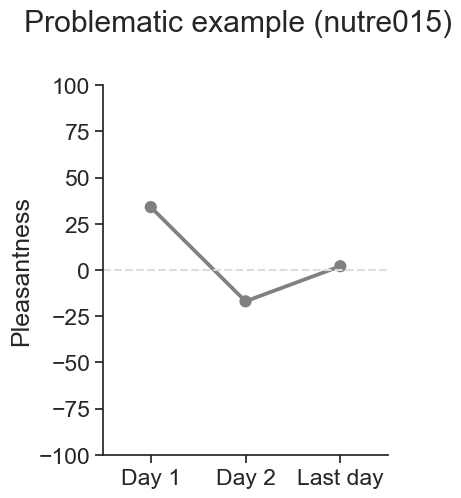

In [152]:
problematic_subject = 'nutre015'

probRatesCalorie_df = ratings_and_calorie_df[(ratings_and_calorie_df.User == problematic_subject) &
                                             (ratings_and_calorie_df.calorie == 'CS-')]

fig, ax = plt.subplots()#figsize=(3.504166666666667,3.597052411167513))

sns.set(font_scale=1.5)
sns.set_style("ticks")
sns.pointplot(data = probRatesCalorie_df, x = 'Day', y = 'pleasantness', ax = ax, color = 'grey')
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
ax.set_xticklabels(['Day 1', 'Day 2', 'Last day'])
ax.set_xlabel('')
ax.set_ylabel('Pleasantness')
ax.set_ylim([-100, 100])
ax.set_box_aspect(1.3)
ax.axhline(0, ls = '--', color = 'gainsboro')
fig.suptitle('Problematic example ({})'.format(problematic_subject), va = 'bottom')

fig.savefig('{}probSubject_pleasRate.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

350.4166666666667,359.7052411167513


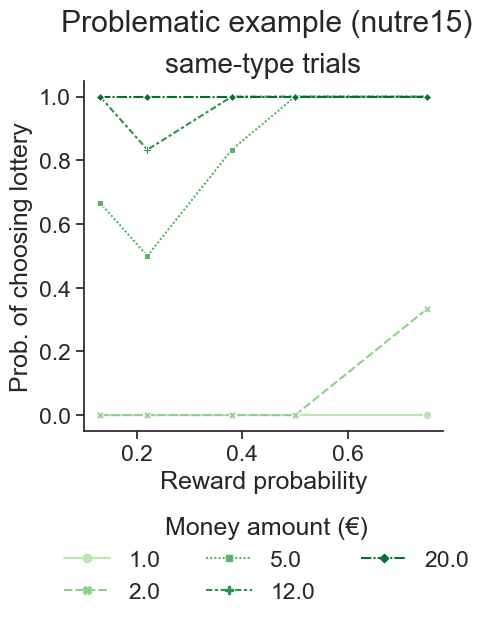

In [147]:
probSubject_df = nutrecon_df[nutrecon_df.User == problematic_subject]
probSubject_df = probSubject_df[probSubject_df.Day == 1]
probSubject_choiceCount_df = probSubject_df.groupby(
            [_v_.group_colName, 'User','Day', 'Trial Type', 
             'reference type', 'reference qt', 'reference p', 
             'lottery type', 'lottery p', 'lottery qt']).apply(
        lambda df: get_probLottery(df)).reset_index().rename(columns = {0 : _v_.probLotteryChoice_colName})
probSubject_choiceCount_df

probSub_sameType_mask = probSubject_choiceCount_df['Trial Type'] == 'same'
probSub_mixedType_mask = probSubject_choiceCount_df['Trial Type'] == 'mixed'
probSub_money_mask = probSubject_choiceCount_df["lottery type"] == 'money'

df = probSubject_choiceCount_df[probSub_sameType_mask & probSub_money_mask]

# Greens Palette without first color
palette = [ (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

sns.set(font_scale=1.5)
sns.set_style("ticks")
g = sns.relplot(
    data=df.reset_index(drop=True), x='lottery p', y=_v_.probLotteryChoice_colName, 
    row="lottery type", col = 'Trial Type',markers = True, height = 4.925, aspect = 1, palette=palette,
    hue="lottery qt", style="lottery qt", kind="line",facet_kws={'sharex': False, 'legend_out': True , },
    )

g.set_titles("{col_name}-type trials", size = 20)
g.set(ylim=(-.05, 1.05))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
g.fig.suptitle('Problematic example (nutre15)', va = 'bottom')
g.set_axis_labels("Reward probability", )

# # Simple legend
# g._legend.set_title('Quantity (€)')

# 3 Columned legend underneath
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g._legend.remove()
g.fig.legend(handles, labels, ncol=3, loc='upper center', 
                bbox_to_anchor=(0.5, 0.05), frameon=False, title = 'Money amount (€)')

g.fig.savefig('{}probSubject_moneyST.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

ax_h, ax_w = g.axes[0,0].bbox.height, g.axes[0,0].bbox.width
print(ax_h, ax_w, sep = ',' )

335.69444444444446,368.9800430543754


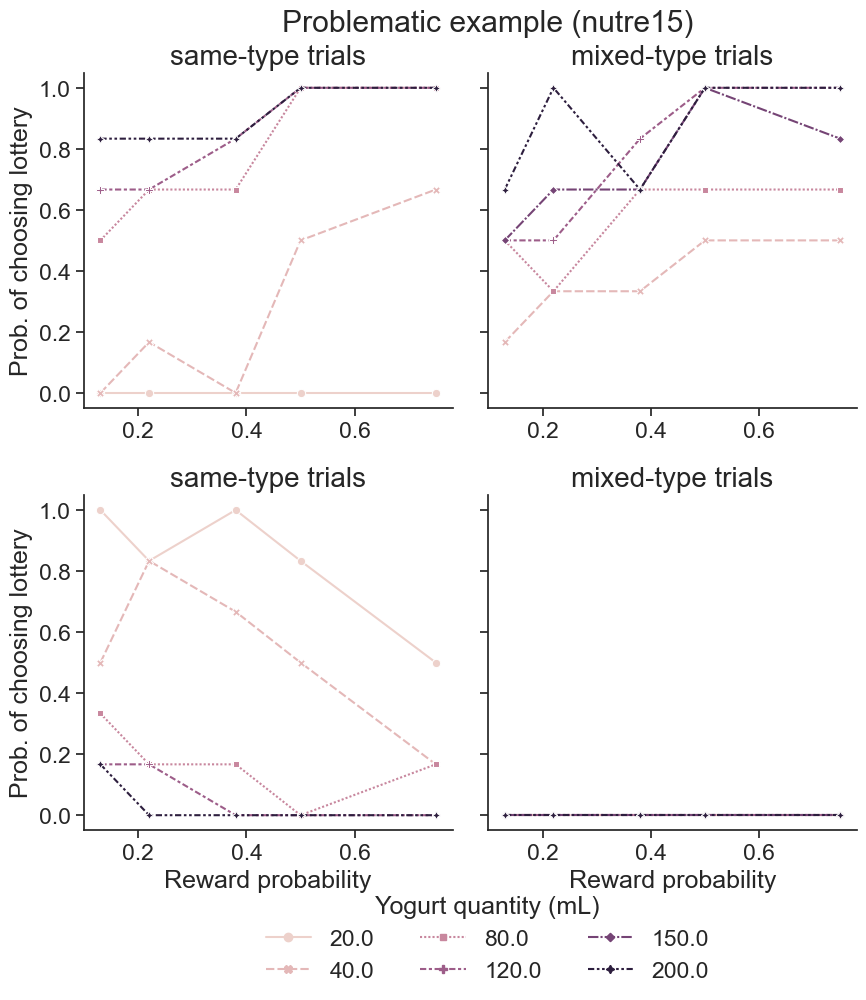

In [148]:
df = probSubject_choiceCount_df[(probSub_sameType_mask | probSub_mixedType_mask) & ~probSub_money_mask]

sns.set(font_scale=1.5)
sns.set_style("ticks")
g = sns.relplot(
    data=df.reset_index(drop=True), x='lottery p', y=_v_.probLotteryChoice_colName, 
    row="lottery type", col = 'Trial Type', col_order= ['same', 'mixed'], row_order = ['CS+', 'CS-'],
    markers = True, height = 4.5, aspect = 1, #palette='rocket_r',
    hue="lottery qt", style="lottery qt", kind="line",facet_kws={'sharex': False, 'legend_out': True },
    )

g.set_titles("{col_name}-type trials", size = 20)
g.set(ylim=(-.05, 1.05))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
g.fig.suptitle('Problematic example (nutre15)', va = 'bottom')
g.set_axis_labels("Reward probability", )

# # Simple legend
# g._legend.set_title('Quantity (mL)')

# 3 Columned legend underneath
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g._legend.remove()
g.fig.legend(handles, labels, ncol=3, loc='upper center', 
                bbox_to_anchor=(0.5, 0.05), frameon=False, title = 'Yogurt quantity (mL)')

g.fig.savefig('{}probSubject_yogurt_STandMT.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

ax_h, ax_w = g.axes[0,0].bbox.height, g.axes[0,0].bbox.width
print(ax_h, ax_w, sep = ',' )

## Cohort 3

### Flavor

In [52]:
def FourflavorRatings_plot(long_df):

    fig = px.line(long_df, 
                facet_col = 'variable',
                x="Day", y='value', color="User and Flavor",  markers=True,
                color_discrete_sequence = px.colors.qualitative.Alphabet,
                hover_data = {'User':True, 
                            _v_.group_colName:True,
                            'shape':False,
                            'Flavor':True,
                            'calorie':False,
                            'Day': False,
                            'variable': False,
                            'value': True}, 
                category_orders=
                    {"User": sorted(list(long_df['User'].unique())),}
                )
                
    fig.update_layout(
        title="Flavor Ratings for 4 selected Flavors",
        legend_title="Subject ID",
    )

    fig.update_traces(textposition="bottom right", marker={'size': 9})
    fig.update_xaxes(type='category')

    return fig

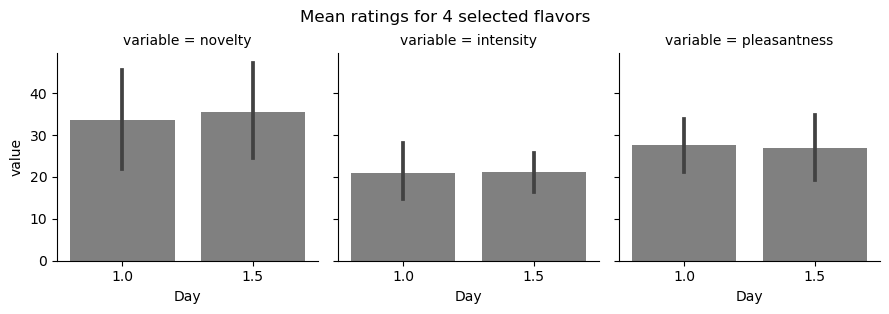

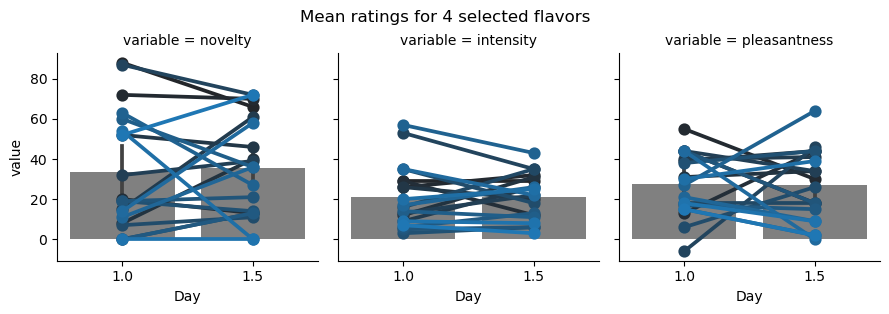

In [53]:
ratings_cohort3_mask = ratings_and_calorie_df.cohort_id == 'cohort 3'
ratings_day1_mask =  ratings_and_calorie_df.Day < 2
ratings_day15_mask =  ratings_and_calorie_df.Day == 1.5

df = ratings_and_calorie_df[ratings_cohort3_mask & ratings_day1_mask]

# Get Flavor that where rated two times
user_flavor_list = list(ratings_and_calorie_df[ratings_cohort3_mask & 
                                               ratings_day15_mask][
                    ['User', 'Flavor']].itertuples(index=False, name=None))

def get_4falvors(row, user_flavor_list):
    return (row['User'], row['Flavor']) in user_flavor_list

flavor_filter = df.apply(lambda row: get_4falvors(row, user_flavor_list), axis = 1)

df = df[flavor_filter]

ratings_and_calorie_longdf = df.melt(
                    id_vars = ['User', _v_.group_colName,'shape', _v_.flavorName_colName, 'calorie', 'Day']
)
ratings_and_calorie_longdf = ratings_and_calorie_longdf.dropna(subset = 'shape')
ratings_and_calorie_longdf['User and Flavor'] = ratings_and_calorie_longdf['User'] + ratings_and_calorie_longdf['Flavor']


g = sns.FacetGrid(data=ratings_and_calorie_longdf, col="variable")
g.map_dataframe(sns.barplot, x="Day", y="value", color='grey')
g.fig.suptitle('Mean ratings for 4 selected flavors', va = 'bottom');

g = sns.FacetGrid(data=ratings_and_calorie_longdf, col="variable")
g.map_dataframe(sns.barplot, x="Day", y="value", color='grey')
g.map_dataframe(sns.pointplot, x="Day", y="value", hue = 'User and Flavor')
g.fig.suptitle('Mean ratings for 4 selected flavors', va = 'bottom');

fig = FourflavorRatings_plot(ratings_and_calorie_longdf)
fig.show()
# fig.write_html("C:/Users/Admin/Downloads/allFlavorRatings.html")

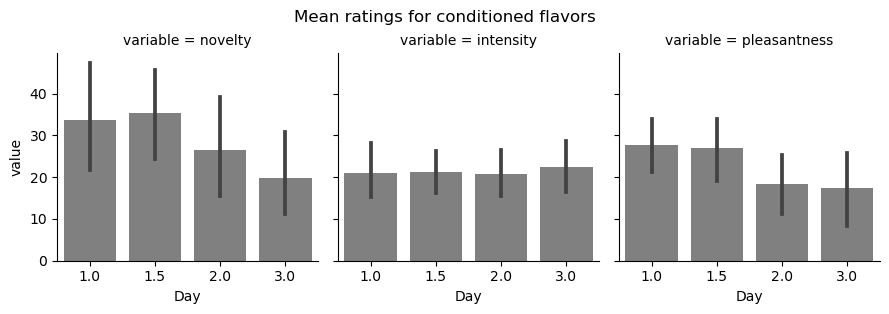

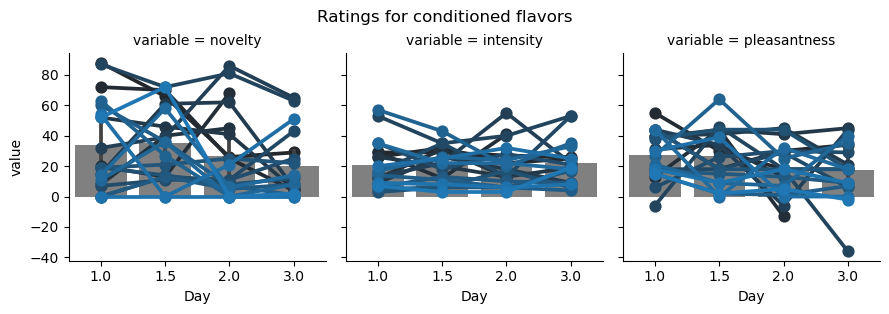

In [54]:


df = ratings_and_calorie_df[ratings_cohort3_mask]



ratings_and_calorie_longdf = df.melt(
                    id_vars = ['User', _v_.group_colName,'shape', _v_.flavorName_colName, 'calorie', 'Day']
)
ratings_and_calorie_longdf = ratings_and_calorie_longdf.dropna(subset = 'shape')
ratings_and_calorie_longdf['User and Flavor'] = ratings_and_calorie_longdf['User'] + ratings_and_calorie_longdf['Flavor']

g = sns.FacetGrid(data=ratings_and_calorie_longdf, col="variable")
g.map_dataframe(sns.barplot, x="Day", y="value", color='grey')
g.fig.suptitle('Mean ratings for conditioned flavors', va = 'bottom');

g = sns.FacetGrid(data=ratings_and_calorie_longdf, col="variable")
g.map_dataframe(sns.barplot, x="Day", y="value", color='grey')
g.map_dataframe(sns.pointplot, x="Day", y="value", hue = 'User and Flavor')
g.fig.suptitle('Ratings for conditioned flavors', va = 'bottom');

fig = myPlots.fullProtocol_flavorRatings(ratings_and_calorie_longdf)
fig.show()

### Neuroeconomics

In [60]:
nutre_cohort3_mask = nutrecon_df.cohort_id == 'cohort 3'
notExluded_mask = nutrecon_df.excluded == 0

nutrecon_cohort3_df = nutrecon_df[nutre_cohort3_mask & notExluded_mask]

# Group Reward quantities

def get_quantities(central_value, round_by):
    list_qts = [round(central_value*0.88, round_by),
            round(central_value*0.92, round_by),
            round(central_value*0.96, round_by),
            round(central_value*1, round_by),
            round(central_value*1.04, round_by),
            round(central_value*1.08, round_by),
            round(central_value*1.12, round_by)]
    return list_qts

def get_quantities_last(central_value, round_by):
    list_qts = [round(central_value*0.87, round_by),
            round(central_value*0.89, round_by),
            round(central_value*0.91, round_by),
            round(central_value*.94, round_by),
            round(central_value*.96, round_by),
            round(central_value*.98, round_by),
            round(central_value*1, round_by)]
    return list_qts

st_yogurt40_lottQs = get_quantities(40, 0)
st_yogurt80_lottQs = get_quantities(80, 0)
st_yogurt120_lottQs = get_quantities_last(120, 0)

st_money5_lottQs = get_quantities(5, 1)
st_money12_lottQs = get_quantities(12, 1)
st_money20_lottQs = get_quantities_last(20, 1)

# Dictionary to create new column with quantities

quantities_dict = dict.fromkeys(st_money5_lottQs, 5)
quantities_dict.update(dict.fromkeys(st_money12_lottQs, 12))
quantities_dict.update(dict.fromkeys(st_money20_lottQs, 20))

quantities_dict.update(dict.fromkeys(st_yogurt40_lottQs, 40))
quantities_dict.update(dict.fromkeys(st_yogurt80_lottQs, 80))
quantities_dict.update(dict.fromkeys(st_yogurt120_lottQs, 120))


In [61]:

# Repacing Real Lottery quantities by "central" jitter quantity 
nutrecon_cohort3_df['real lottery qt'] = nutrecon_cohort3_df['lottery qt']
nutrecon_cohort3_df['lottery qt'] = nutrecon_cohort3_df['lottery qt'].replace(quantities_dict)


def get_probLottery(group):
  prob_lotteryChoice = len(group[group['choice'] == 2]) / len(group[group['choice'] != 0])
  return prob_lotteryChoice

# [_v_.group_colName, 'User','Day', 'Trial Type', 
#              'reference type', 'reference qt', 'reference p', 'reference flavor', 
#              'lottery type', 'lottery p', 'lottery qt', 'lottery flavor']

nutrecon_cohort3_choiceCount_df = nutrecon_cohort3_df.groupby(
            [_v_.group_colName, 'User','Day', 'Trial Type', 
             'reference type', 'reference qt', 'reference p', 'reference flavor', 
             'lottery type', 'lottery p', 'lottery qt', 'lottery flavor'], dropna=False).apply(
        lambda df: get_probLottery(df)).reset_index().rename(columns = {0 : _v_.probLotteryChoice_colName})

nutrecon_cohort3_choiceCount_df 

C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\2398861329.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\2398861329.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cohort_id,User,Day,Trial Type,reference type,reference qt,reference p,reference flavor,lottery type,lottery p,lottery qt,lottery flavor,Prob. of choosing lottery
0,cohort 3,nutre023,1,mixed,money,0.2,1.0,NaN,CS+,0.13,20.0,ginseng,0.000000
1,cohort 3,nutre023,1,mixed,money,0.2,1.0,NaN,CS+,0.13,40.0,ginseng,0.000000
2,cohort 3,nutre023,1,mixed,money,0.2,1.0,NaN,CS+,0.13,80.0,ginseng,0.000000
3,cohort 3,nutre023,1,mixed,money,0.2,1.0,NaN,CS+,0.13,120.0,ginseng,0.000000
4,cohort 3,nutre023,1,mixed,money,0.2,1.0,NaN,CS+,0.22,20.0,ginseng,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,cohort 3,nutre032,3,same,money,2.0,1.0,NaN,money,0.50,20.0,NaN,0.000000
2831,cohort 3,nutre032,3,same,money,2.0,1.0,NaN,money,0.75,2.0,NaN,0.000000
2832,cohort 3,nutre032,3,same,money,2.0,1.0,NaN,money,0.75,5.0,NaN,0.857143
2833,cohort 3,nutre032,3,same,money,2.0,1.0,NaN,money,0.75,12.0,NaN,1.000000


#### Per Participant

In [63]:
def lotteryChoices_PrPerQ(df, title):

    hover_cols = ['cohort_id', 'User', 'lottery flavor', 'lottery type']
    hover_data = {key:False for key in df.columns}
    for key in hover_cols:
        hover_data[key] = True

    if len(df['lottery type'].unique()) == 1:
        fig = px.line(df, facet_col = 'lottery qt', facet_row ="Day",
                    x="lottery p", y=_v_.probLotteryChoice_colName, 
                    color="User",  markers=True, line_group = _v_.group_colName,
                    color_discrete_sequence = px.colors.qualitative.Alphabet,
                    hover_data = hover_data, 
                    category_orders= {
                                'Day': sorted(list(df['Day'].unique())),
                                'lottery p': sorted(list(df['lottery p'].unique())),
                                }
                        )
        fig.update_layout(
            title = title,
            legend_title="Subject ID",
        )
    else:
        fig = px.line(df, facet_col = 'lottery qt', facet_row ="Day",
                    x="lottery p", y=_v_.probLotteryChoice_colName, 
                    color="User",  markers=True, line_group = _v_.group_colName,
                    symbol = 'lottery type', line_dash='lottery type',
                    color_discrete_sequence = px.colors.qualitative.Alphabet,
                    hover_data = hover_data, 
                    category_orders= {
                                'Day': sorted(list(df['Day'].unique())),
                                'lottery p': sorted(list(df['lottery p'].unique())),
                                }
                        )
        fig.update_layout(
            title = title,
            legend_title="Subject ID, reward",
        )                                
    
    fig.layout["yaxis1"].title.text = ""
    fig.layout["yaxis11"].title.text = ""

    fig.update_traces(textposition="bottom right")

    return fig

In [64]:
cohort3_sameType_mask = nutrecon_cohort3_choiceCount_df['Trial Type'] == 'same'
cohort3_mixedType_mask = nutrecon_cohort3_choiceCount_df['Trial Type'] == 'mixed'
cohort3_money_mask = nutrecon_cohort3_choiceCount_df["lottery type"] == 'money'

df = nutrecon_cohort3_choiceCount_df[cohort3_sameType_mask & cohort3_money_mask]

lotteryChoices_PrPerQ(df, 'Cohort 3 - Money trials')

In [65]:
df = nutrecon_cohort3_choiceCount_df[cohort3_sameType_mask & ~cohort3_money_mask]

lotteryChoices_PrPerQ(df, 'Cohort 3 - Iogurt Same-type trials')

In [66]:
df = nutrecon_cohort3_choiceCount_df[cohort3_mixedType_mask]

lotteryChoices_PrPerQ(df, 'Cohort 3 - Iogurt Mixed-type trials')

#### Group

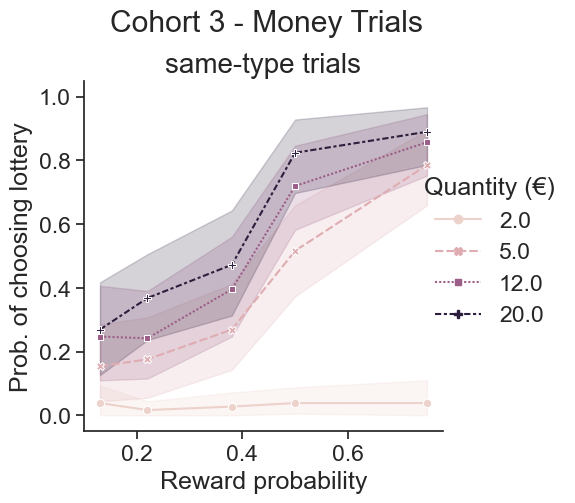

In [100]:
cohort3_sameType_mask = nutrecon_cohort3_choiceCount_df['Trial Type'] == 'same'
cohort3_mixedType_mask = nutrecon_cohort3_choiceCount_df['Trial Type'] == 'mixed'
cohort3_money_mask = nutrecon_cohort3_choiceCount_df["lottery type"] == 'money'

df = nutrecon_cohort3_choiceCount_df[cohort3_sameType_mask & cohort3_money_mask]

# # Greens Palette without first color
# palette = [ (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
#  (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
#  (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
#  (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
#  (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

sns.set(font_scale=1.5)
sns.set_style("ticks")
g = sns.relplot(
    data=df.reset_index(drop=True), x='lottery p', y=_v_.probLotteryChoice_colName, 
    row="lottery type", col = 'Trial Type',markers = True, height = 4.925, aspect = 1, #palette=palette,
    hue="lottery qt", style="lottery qt", kind="line",facet_kws={'sharex': False, 'legend_out': True , },
    )

g.set_titles("{col_name}-type trials", size = 20)
g.set(ylim=(-.05, 1.05))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
g.fig.suptitle('Cohort 3 - Money Trials', va = 'bottom')
g.set_axis_labels("Reward probability", )

# Simple legend
g._legend.set_title('Quantity (€)')

# # 3 Columned legend underneath
# handles, labels = g.axes[0, 0].get_legend_handles_labels()
# g._legend.remove()
# g.fig.legend(handles, labels, ncol=3, loc='upper center', 
#                 bbox_to_anchor=(0.5, 0.05), frameon=False, title = 'Money amount (€)')


# g.fig.savefig('{}cohort2_moneyST.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

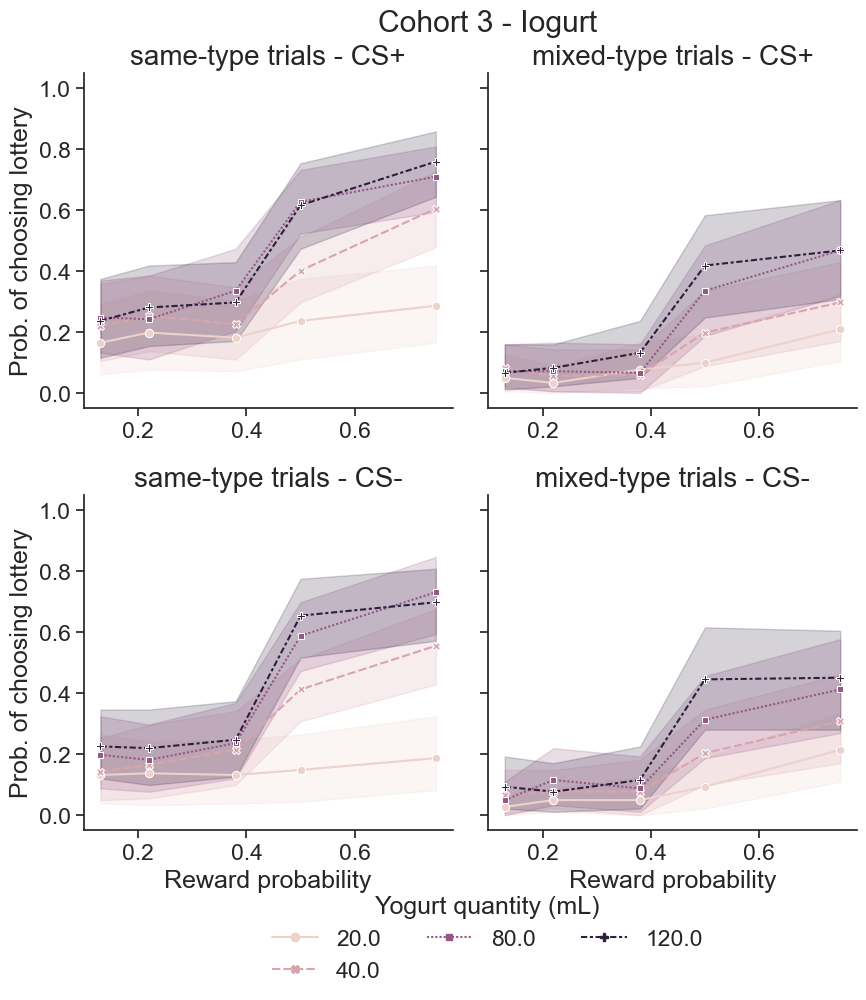

In [103]:
df = nutrecon_cohort3_choiceCount_df[(cohort3_sameType_mask | cohort3_mixedType_mask) & ~cohort3_money_mask]

sns.set(font_scale=1.5)
sns.set_style("ticks")
g = sns.relplot(
    data=df.reset_index(drop=True), x='lottery p', y=_v_.probLotteryChoice_colName, 
    row="lottery type", col = 'Trial Type', col_order= ['same', 'mixed'], row_order = ['CS+', 'CS-'],
    markers = True, height = 4.5, aspect = 1, #palette='rocket_r',
    hue="lottery qt", style="lottery qt", kind="line",facet_kws={'sharex': False, 'legend_out': True },
    )

g.set_titles("{col_name}-type trials - {row_name}", size = 20)
g.set(ylim=(-.05, 1.05))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
g.fig.suptitle('Cohort 3 - Iogurt', va = 'bottom')
g.set_axis_labels("Reward probability", )

# # Simple legend
# g._legend.set_title('Quantity (mL)')

# 3 Columned legend underneath
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g._legend.remove()
g.fig.legend(handles, labels, ncol=3, loc='upper center', 
                bbox_to_anchor=(0.5, 0.05), frameon=False, title = 'Yogurt quantity (mL)')

# g.fig.savefig('{}cohort2_yogurt_STandMT.pdf'.format(figure_path), dpi = 300, transparent = True, bbox_inches='tight')

# Model Estimation

In [62]:
import numpy as np
import random 
import pandas as pd
from scipy.optimize import minimize

st_id = 'same'
mt_id = 'mixed'
money_id = 'Money'
cPlus_id = 'CS+'
cMinus_id = 'CS-'

optimize_cols = ['Trial Type',
              'reference type', 'reference qt', 'reference p',
              'lottery type', 'lottery qt', 'lottery p',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']

def get_probLottery(group):
  '''
  Missed Trials should be removed and choices should be coded as 0 and 1 (reference and lottery, respectly)
  '''
  prob_lotteryChoice = len(group[group['choice'] == 1]) / len(group)
  return prob_lotteryChoice


# %%_______________________ Likelihood computation __________________________
# ===========================================================================

def _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                 lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                 beta_arr, sFactor_arr, 
                 choice_arr):
    
    euR = ref_prob_arr*ref_qt_arr**ref_alpha_arr 
    euL = lott_prob_arr*lott_qt_arr**lott_alpha_arr

    # Compute things once, sign flip to possibly save one operation
    y = beta_arr*(euR - euL*sFactor_arr)
    chose_ref = choice_arr==False

    # values to be summed up, already negative:
    nll_v = np.log(1 + np.exp(y))
    nll_v[chose_ref] = nll_v[chose_ref] - y[chose_ref]

    return np.sum(nll_v)


def _get_st_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 4:
       # Three alphas, one beta 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[lott_type_arr == money_id] = st_money_beta
       beta_arr[lott_type_arr == cPlus_id] = st_cPlus_beta
       beta_arr[lott_type_arr == cMinus_id] = st_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood


def _get_mt_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)


    # Unpack params
    if len(params) == 2:
       # two scaling factors
       (cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 4:
       # Two betas and two scaling factors
       (mt_cPlus_beta, mt_cMinus_beta,
        cPlus_sFactor, cMinus_sFactor) = params

       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

       beta_arr[lott_type_arr == cMinus_id] = mt_cPlus_beta
       beta_arr[lott_type_arr == money_id] = mt_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def _get_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    trial_type_arr = df[cols[0]].values
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 6:
       # Three alphas, one beta and two scaling factors (beta is unpacked directly)
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta, 
       cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 10:
       # Three alphas, five betas, two scaling factors 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
        st_money_beta, st_cPlus_beta, st_cMinus_beta,
        mt_cPlus_beta, mt_cMinus_beta,
        cPlus_sFactor, cMinus_sFactor) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha      # This should never happen
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha    # This should never happen

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == money_id)] = st_money_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cPlus_id)] = st_cPlus_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cMinus_id)] = st_cMinus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == cMinus_id)] = mt_cPlus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == money_id)] = mt_cMinus_beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cPlus_sFactor


    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood


# %%__________________________ Model Estimation _____________________________
# ===========================================================================

def simultaneous_estimate(args, x0):
  res = minimize(_get_nll, x0, args=args)
  return res

def stepwise_estimate_MultiOpt(args, x0, N_optimizers):

    def _get_iter_params(xk):
        iter_params_list.append(xk.tolist())
    
    df = args
    st_mask = df[optimize_cols[0]] == 'same'
    mt_mask = df[optimize_cols[0]] == 'mixed'

    cPlus_mask = df[optimize_cols[4]] == 'CS+'
    cMinus_mask = df[optimize_cols[4]] == 'CS-'

    # Unpack initialization parameters
    if len(x0) == 6:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    beta)
        mt_params = (cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'beta']
        mt_params_colNames = ['CS+ sFactor', 'CS- sFactor']
    elif len(x0) == 10:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta,
            mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    st_money_beta, st_cPlus_beta, st_cMinus_beta)
        mt_params = (mt_cPlus_beta, mt_cMinus_beta,
                    cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'Money beta', 'CS+ st beta', 'CS- st beta', ]
        mt_params_colNames = ['CS+ mt beta', 'CS- mt beta',
                                'CS+ sFactor', 'CS- sFactor']

    for n_opt in range(N_optimizers):
        x0_st_params = tuple([random.uniform(*pars) for pars in st_params])
        # Estimate parameters from Same type trials

        iter_params_list = []
        res_st_ = minimize(_get_st_nll, x0_st_params, args=df.loc[st_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_st = res_st_
        else:
            if res_st_.fun < res_st.fun:
                res_st = res_st_

    st_iterParams_df = pd.DataFrame(iter_params_list, columns=st_params_colNames)

    # map same type estimation results to required fields
    df.loc[mt_mask, optimize_cols[8]] = res_st.x[0]                 # Money alpha
    df.loc[mt_mask & cPlus_mask, optimize_cols[9]] = res_st.x[1]    # CS+ alpha
    df.loc[mt_mask & cMinus_mask, optimize_cols[9]] = res_st.x[2]   # CS- alpha
    if len(x0) == 6:
        df.loc[mt_mask, optimize_cols[10]] = res_st.x[3]              # beta
    for n_opt in range(N_optimizers):
        x0_mt_params = tuple([random.uniform(*pars) for pars in mt_params])
        # Estimate parameters from mixed type trials
        iter_params_list = []
        res_mt_ = minimize(_get_mt_nll, x0_mt_params, args=df.loc[mt_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_mt = res_mt_
        else:
            if res_mt_.fun < res_st.fun:
                res_mt = res_mt_
    mt_iterParams_df = pd.DataFrame(iter_params_list, columns=mt_params_colNames)

    return res_st, res_mt, st_iterParams_df, mt_iterParams_df


def print_stepwiseModel_output(res_st, res_mt):
  print('Same type trials')
  print(50 * '=')
  print('  {}\n    - parameters: {}\n  - std. error: {}'.format(res_st.message, res_st.x, np.sqrt(np.diag(res_st.hess_inv))))
  print('\nConfidene intervals:')
  parsCI_st = ['{} \xb1 {}'.format(round(res_st.x[p],3), round(1.96*np.sqrt(np.diag(res_st.hess_inv))[p],3)) for p in range(len(res_st.x))]
  for p in range(len(parsCI_st)): print('  - parameter {}: {}'.format(p + 1, parsCI_st[p]))
  print('\nMixed type trials')
  print(50 * '=')
  print('  {}\n    - parameters: {}\n  - std. error: {}'.format(res_mt.message, res_mt.x, np.sqrt(np.diag(res_mt.hess_inv))))
  print('\n  Confidene intervals:')
  parsCI_mt = ['{} \xb1 {}'.format(round(res_mt.x[p],3), round(1.96*np.sqrt(np.diag(res_mt.hess_inv))[p],3)) for p in range(len(res_mt.x))]
  for p in range(len(parsCI_mt)): print('    - parameter {}: {}'.format(p + 1, parsCI_mt[p]))
  return parsCI_st + parsCI_mt


In [63]:
subject_id = 'nutre023'
test_day = 2

# Get Dataframe for one subject/task (only columns of interest)
subject_task_df = nutrecon_df.loc[(nutrecon_df.User == subject_id) &
                              (nutrecon_df.Day == test_day), optimize_cols[:-4]]
# Create nan filled columns for parameters 
for col in optimize_cols[-4:]:
    subject_task_df[col] = np.nan

# remove missed trials and code choices as 0 (ref) and 1 (lottery)
subject_task_df = subject_task_df[subject_task_df.choice != 0]
subject_task_df['choice'] = subject_task_df.choice - 1

# get columns of interest for parameter estimation

print(subject_task_df.columns)
subject_task_df.shape

Index(['Trial Type', 'reference type', 'reference qt', 'reference p',
       'lottery type', 'lottery qt', 'lottery p', 'choice', 'ref_alpha_est',
       'lott_alpha_est', 'beta_est', 'sFactor_est'],
      dtype='object')


(735, 12)

In [64]:
args = subject_task_df.copy()
N_optimizers = 5

alphaMoney0 = (0.1, 1.5)
alphaCplus0 = (0.1, 1.5)
alphaCminus0 = (0.1, 1.5)

st_betaMoney0 = (0.5, 15) # also used in model with only one beta
st_betaCplus0 = (0.5, 15)
st_betaCminus0 = (0.5, 15)
mt_betaCplus0 = (0.5, 15)
mt_betaCminus0 = (0.5, 15)

sFactorCplus0 = (0.01, 0.5)
sFactorCminus0= (0.01, 0.5)


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

res_st, res_mt, st_iterParams_df, mt_iterParams_df = stepwise_estimate_MultiOpt(args, x0_6params, N_optimizers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19060\3334577890.py:43: RuntimeWarning: overflow encountered in exp
  nll_v = np.log(1 + np.exp(y))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Admin\AppData\Local\Temp\ipykernel_19060\3334577890.py:43: RuntimeWarning: overflow encountered in exp
  nll_v = np.log(1 + np.exp(y))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19060\3334577890.py:43: RuntimeWarning: overflow encountered in exp
  nll_v = np.log(1 + np.exp(y))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Admin\AppData\Local\Temp\ipykernel_19060\3334577890.py:43: RuntimeWarning: overflow encountered in exp
  nll_v = np.log(1 + np.exp(y))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19060\3334577890.py:43: RuntimeWarning: overflow encount

In [65]:


print_stepwiseModel_output(res_st, res_mt)

Same type trials
  Optimization terminated successfully.
    - parameters: [1.46993792 0.22277729 0.31109104 2.82828698]
  - std. error: [1.         0.04385997 0.03647669 0.2679969 ]

Confidene intervals:
  - parameter 1: 1.47 ± 1.96
  - parameter 2: 0.223 ± 0.086
  - parameter 3: 0.311 ± 0.071
  - parameter 4: 2.828 ± 0.525

Mixed type trials
  Optimization terminated successfully.
    - parameters: [0.12075389 0.02944707]
  - std. error: [1. 1.]

  Confidene intervals:
    - parameter 1: 0.121 ± 1.96
    - parameter 2: 0.029 ± 1.96


['1.47 ± 1.96',
 '0.223 ± 0.086',
 '0.311 ± 0.071',
 '2.828 ± 0.525',
 '0.121 ± 1.96',
 '0.029 ± 1.96']

In [66]:
res_st

      fun: 127.11198870282047
 hess_inv: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.92369694e-03,  1.36682181e-04,
        -4.04728720e-03],
       [ 0.00000000e+00,  1.36682181e-04,  1.33054913e-03,
        -2.50610788e-03],
       [ 0.00000000e+00, -4.04728720e-03, -2.50610788e-03,
         7.18223365e-02]])
      jac: array([ 0.00000000e+00,  6.67572021e-06, -1.90734863e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 123
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([1.46993792, 0.22277729, 0.31109104, 2.82828698])